<a href="https://colab.research.google.com/github/SiddharthaPand4/internshipTask/blob/master/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)
import numpy as np
import csv
import random

2.1.0


In [0]:
split_ratio = .8
features=[]
labels=[]
details=[]

with open("/tmp/musk_csv.csv") as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  for row in reader:
    features.append(row[3:-1])
    labels.append(row[-1])
    details.append(row[0:3])

In [0]:
zeros=0
ones=0
zeros_features=[]
ones_features=[]
zeros_labels=[]
ones_labels=[]
for i in range(len(labels)):
  if labels[i]=='0':
    zeros += 1
    zeros_features.append(features[i])
    zeros_labels.append(labels[i])
  else:
    ones +=1
    ones_features.append(features[i])
    ones_labels.append(labels[i])

x_train=[]
#print(len(zeros_features[:int(split_ratio*len(zeros_features))]))
x_train.extend(zeros_features[:int(split_ratio*len(zeros_features))])
x_train.extend(ones_features[:int(split_ratio*len(ones_features))])

y_train=[]
y_train.extend(zeros_labels[:int(split_ratio*len(zeros_labels))])
y_train.extend(ones_labels[:int(split_ratio*len(ones_labels))])

x_val=[]
x_val.extend(zeros_features[int(split_ratio*len(zeros_features)):])
x_val.extend(ones_features[int(split_ratio*len(ones_features)):])

y_val=[]
y_val.extend(zeros_labels[int(split_ratio*len(zeros_labels)):])
y_val.extend(ones_labels[int(split_ratio*len(ones_labels)):])

feature_label = list(zip(x_train, y_train))
random.shuffle(feature_label)
x_train, y_train = zip(*feature_label)

feature_label = list(zip(x_train, y_train))
random.shuffle(feature_label)
x_train, y_train = zip(*feature_label)

In [4]:
total = len(labels)
one_weight = (1 / ones)*(total)/2.0 
zero_weight = (1 / zeros)*(total)/2.0
class_weight = {0:zero_weight, 1:one_weight}
print(one_weight)
print(zero_weight)

3.2438544739429696
0.5911127038165204


In [5]:
x_train = np.asarray(x_train, dtype=float)
y_train = np.asarray(y_train, dtype=float)
y_train = np.expand_dims(y_train, axis=1)
mean_train = np.mean(x_train, axis=0, keepdims=True)
std_train = np.std(x_train, axis=0, keepdims=True)
x_train = (x_train - mean_train)/std_train
print(x_train.shape)
print(y_train.shape)

x_val = np.asarray(x_val, dtype=float)
y_val = np.asarray(y_val, dtype=float)
y_val = np.expand_dims(y_val, axis=1)
mean_val = np.mean(x_val, axis=0, keepdims=True)
std_val = np.std(x_val, axis=0, keepdims=True)
x_val = (x_val - mean_val)/std_val



(5277, 166)
(5277, 1)


In [0]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
]

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l1(0.01)),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(loss="binary_crossentropy", metrics=['accuracy'], weighted_metrics=['accuracy'])
#model.summary()

history = model.fit(x_train, y_train, epochs=200, validation_data=(x_val, y_val), verbose=2, class_weight=class_weight)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 5277 samples, validate on 1321 samples
Epoch 1/200
5277/5277 - 1s - loss: 4.2666 - accuracy: 0.7982 - accuracy_1: 0.7922 - val_loss: 1.2910 - val_accuracy: 0.9372 - val_accuracy_1: 0.9589
Epoch 2/200
5277/5277 - 0s - loss: 0.8958 - accuracy: 0.8605 - accuracy_1: 0.8361 - val_loss: 0.5867 - val_accuracy: 0.9122 - val_accuracy_1: 0.9281
Epoch 3/200
5277/5277 - 0s - loss: 0.6362 - accuracy: 0.8461 - accuracy_1: 0.8281 - val_loss: 0.5299 - val_accuracy: 0.8978 - val_accuracy_1: 0.9176
Epoch 4/200
5277/5277 - 0s - loss: 0.5902 - accuracy: 0.8399 - accuracy_1: 0.8334 - val_loss: 0.5264 - val_accuracy: 0.8660 - val_accuracy_1: 0.8867
Epoch 5/200
5277/5277 - 0s - loss: 0.5670 - accuracy: 0.8463 - accuracy_1: 0.8398 - val_loss: 0.5092 - val_accuracy: 0.8902 - val_accuracy_1: 0.8990
Epoch 6/200
5277/5277 - 0s - loss: 0.5522 - accuracy: 0.8503 - accuracy_1: 0.8476 - val_loss: 0.4857 - val_accuracy: 0.8706 - val_accuracy_1: 0.8834
Epoch 7/

<Figure size 432x288 with 0 Axes>

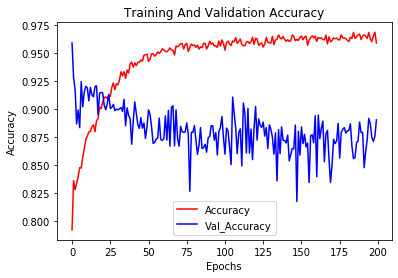

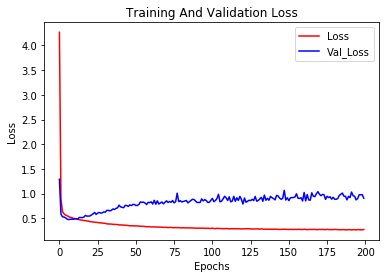

<Figure size 432x288 with 0 Axes>

In [8]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy_1']
val_acc = history.history['val_accuracy_1']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training And Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Val_Accuracy'])
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training And Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss', 'Val_Loss'])
plt.figure()